In [1]:
import pandas as pd
import numpy as np

データを読み込む

In [2]:
df = pd.read_csv('./cbb19.csv')

In [3]:
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,Gonzaga,WCC,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,...,35.3,25.9,61.4,43.4,36.3,30.4,72.0,7.0,E8,1.0
1,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,29.1,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0
2,Duke,ACC,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,...,33.2,24.0,58.0,45.0,30.8,29.9,73.6,11.2,E8,1.0
3,North Carolina,ACC,36,29,120.1,91.4,0.9582,52.9,48.9,17.2,...,30.2,28.4,52.1,47.9,36.2,33.5,76.0,10.0,S16,1.0
4,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,...,27.5,24.1,51.8,44.3,34.2,29.1,65.9,9.2,S16,2.0


データクレンジング

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 23 columns):
TEAM          353 non-null object
CONF          353 non-null object
G             353 non-null int64
W             353 non-null int64
ADJOE         353 non-null float64
ADJDE         353 non-null float64
BARTHAG       353 non-null float64
EFG_O         353 non-null float64
EFG_D         353 non-null float64
TOR           353 non-null float64
TORD          353 non-null float64
ORB           353 non-null float64
DRB           353 non-null float64
FTR           353 non-null float64
FTRD          353 non-null float64
2P_O          353 non-null float64
2P_D          353 non-null float64
3P_O          353 non-null float64
3P_D          353 non-null float64
ADJ_T         353 non-null float64
WAB           353 non-null float64
POSTSEASON    68 non-null object
SEED          68 non-null float64
dtypes: float64(18), int64(2), object(3)
memory usage: 63.6+ KB


欠損値のある列("POSTSEASON"、"SEED")を除去する

In [5]:
df = df.drop(["POSTSEASON", "SEED"], axis=1)

In [7]:
df.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,31.745042,17.113314,103.335977,103.336261,0.493214,50.600850,50.774504,18.606516,18.523513,28.245892,28.420397,32.954391,33.202550,50.060057,50.233994,34.287819,34.415864,69.168555,-7.783569
std,2.514195,6.374993,7.020019,6.452597,0.253006,2.938629,2.752896,2.066711,2.092719,3.938373,2.923335,4.708719,5.080133,3.362801,3.122286,2.537098,2.336075,2.694397,7.120550
min,26.000000,3.000000,83.700000,85.200000,0.034600,40.000000,42.500000,13.500000,13.300000,15.900000,21.700000,21.900000,21.800000,37.700000,40.700000,27.900000,27.900000,60.700000,-23.400000
25%,30.000000,12.000000,98.600000,98.700000,0.281400,48.800000,48.900000,17.200000,17.100000,25.400000,26.300000,29.900000,29.700000,47.700000,48.300000,32.400000,32.900000,67.300000,-13.100000
50%,31.000000,17.000000,103.100000,104.000000,0.476200,50.500000,50.900000,18.500000,18.300000,28.300000,28.300000,33.300000,32.700000,50.300000,50.200000,34.200000,34.400000,69.000000,-8.600000
75%,33.000000,21.000000,107.700000,107.800000,0.689300,52.800000,52.600000,19.800000,19.800000,31.000000,30.400000,35.900000,36.400000,52.200000,52.200000,36.000000,35.900000,70.800000,-3.100000
max,39.000000,35.000000,123.400000,119.200000,0.974400,59.000000,59.300000,25.100000,24.700000,38.700000,37.100000,48.100000,54.000000,61.400000,61.200000,42.400000,41.800000,79.100000,11.200000


データ加工

カテゴリ変数を二値化する

In [8]:
df = pd.get_dummies(df, columns=['CONF'])

In [9]:
df.head()

,TEAM,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,...,CONF_P12,CONF_Pat,CONF_SB,CONF_SC,CONF_SEC,CONF_SWAC,CONF_Slnd,CONF_Sum,CONF_WAC,CONF_WCC
0,Gonzaga,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,19.0,...,0,0,0,0,0,0,0,0,0,1
1,Virginia,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,17.5,...,0,0,0,0,0,0,0,0,0,0
2,Duke,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,19.4,...,0,0,0,0,0,0,0,0,0,0
3,North Carolina,36,29,120.1,91.4,0.9582,52.9,48.9,17.2,18.3,...,0,0,0,0,0,0,0,0,0,0
4,Michigan,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,18.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 52 columns):
TEAM         353 non-null object
G            353 non-null int64
W            353 non-null int64
ADJOE        353 non-null float64
ADJDE        353 non-null float64
BARTHAG      353 non-null float64
EFG_O        353 non-null float64
EFG_D        353 non-null float64
TOR          353 non-null float64
TORD         353 non-null float64
ORB          353 non-null float64
DRB          353 non-null float64
FTR          353 non-null float64
FTRD         353 non-null float64
2P_O         353 non-null float64
2P_D         353 non-null float64
3P_O         353 non-null float64
3P_D         353 non-null float64
ADJ_T        353 non-null float64
WAB          353 non-null float64
CONF_A10     353 non-null uint8
CONF_ACC     353 non-null uint8
CONF_AE      353 non-null uint8
CONF_ASun    353 non-null uint8
CONF_Amer    353 non-null uint8
CONF_B10     353 non-null uint8
CONF_B12     353 non-null ui

学習用と評価用にデータを分割する

In [11]:
# 評価用データとして元データからランダムに30件を抽出
df_test = df.sample(n=30, random_state=0)

In [12]:
# 学習用データは元データから評価用データを除いたもの
df_train = df[~df['TEAM'].isin(df_test['TEAM'])]

データを目的変数と説明変数に分離する

In [13]:
# df_xxx_Xは目的変数を除去したデータ
df_train_X = df_train.drop(['W'], axis=1)
df_test_X = df_test.drop(['W'], axis=1)
# df_xxx_yは目的変数のみのデータ
df_train_y = df_train['W']
df_test_y = df_test['W']

In [14]:
# チーム名だけ保持しておく
df_train_team_X = df_train_X['TEAM']
df_test_team_X = df_test_X['TEAM']

オブジェクト型のデータを除去する

In [15]:
df_train_X = df_train_X.drop(['TEAM', 'WAB'], axis=1)
df_test_X = df_test_X.drop(['TEAM', 'WAB'], axis=1)
#df_train_X = df_train_X.drop(['TEAM'], axis=1)
#df_test_X = df_test_X.drop(['TEAM'], axis=1)

標準化する

In [16]:
from sklearn.preprocessing import StandardScaler

# 学習用データ
X_sc_df = StandardScaler()

# 元データからパラメータ(平均、分散)を算出する
X_sc_df.fit(df_train_X)
# 元データを変換
df_train_X_std = X_sc_df.transform(df_train_X)

# 評価用データ
X_sc_df = StandardScaler()

# 元データからパラメータ(平均、分散)を算出する
X_sc_df.fit(df_test_X)
# 元データを変換
df_test_X_std = X_sc_df.transform(df_test_X)

# 目的変数は元データが一列しかないので標準化の式に当てはめて変換
df_train_y_std = (df_train_y - df_train_y.mean())/df_train_y.std()
df_test_y_std = (df_test_y - df_test_y.mean())/df_test_y.std()

重回帰分析のためのモデル作成、実行

In [17]:
from sklearn.linear_model import LinearRegression

データ分割

In [18]:
from sklearn.model_selection import train_test_split
linreg = LinearRegression()

In [19]:
#学習データと予測データに分割(学習データ:予測データ=7:3)
#X_train,X_pred,y_train,y_pred = train_test_split(X_learn_std,y_learn_std,random_state=1,test_size=0.3)
X_train_data,X_pred_data,y_train_data,y_pred_data = train_test_split(df_train_X_std,df_train_y_std,test_size=0.3)

モデルの作成と実行

In [20]:
# 線形回帰モデルへ当てはめる
linreg.fit(X_train_data,y_train_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# 予測実行
pred_result = linreg.predict(X_pred_data)

In [22]:
# 予測結果を逆標準化
# 予測値
y_pred_data.predict = pred_result * df_train_y.std() + df_train_y.mean()
# 正解
y_pred_val = y_pred_data * df_train_y.std() + df_train_y.mean()

予実結果の可視化

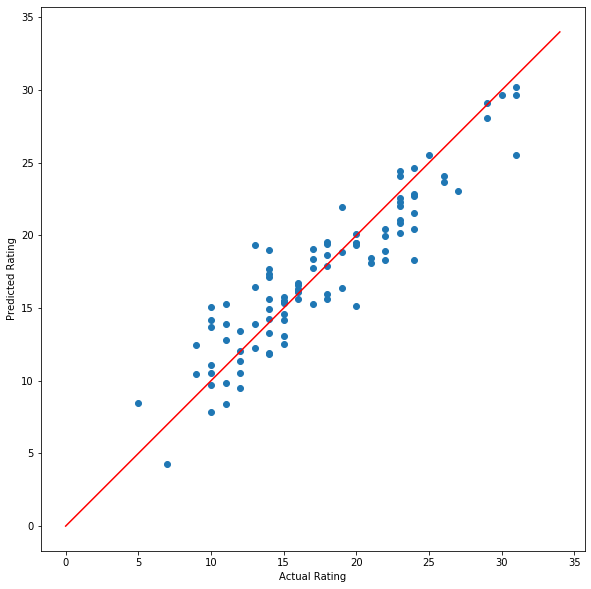

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.scatter(y_pred_val, y_pred_data.predict)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.gca().set_aspect("equal", adjustable="box")

x = np.arange(0, 35)
y=x
plt.plot(x,y,color="red")

誤差の計測

In [24]:
rmse = np.sqrt(sum((y_pred_val - y_pred_data.predict) ** 2) / len(y_pred_val))
print("RMSE = ", rmse)

RMSE =  2.3337277771581415


説明変数の影響度を確認

FTRD        -0.099656
CONF_P12    -0.101279
ORB          0.110893
CONF_BSky    0.114087
DRB         -0.121065
CONF_Slnd    0.132208
CONF_B12    -0.150123
CONF_ACC    -0.155159
CONF_SEC    -0.158515
CONF_B10    -0.162363
3P_O         0.179081
G            0.187386
3P_D         0.194307
2P_O         0.207384
BARTHAG      0.231170
TORD         0.241783
EFG_O       -0.303884
2P_D         0.389511
ADJOE        0.409850
EFG_D       -0.839674
Name: Coef, dtype: float64

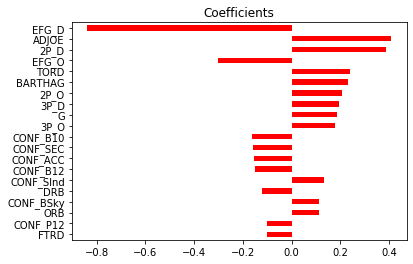

In [25]:
coef_df = pd.DataFrame({"Coef":linreg.coef_, "Coef_abs":np.abs(linreg.coef_)})
coef_df.index = df_train_X.columns
coef_df = coef_df.sort_values(by="Coef_abs")
coef_df["Coef"].tail(20).plot(kind="barh", title="Coefficients", color="red")
coef_df["Coef"].tail(20)

全学習データに対して重回帰分析を実施する

In [26]:
linreg_all = LinearRegression()

In [27]:
#lr_model_all = linreg_all.fit(X_learn_std,y_learn_std)
linreg_all.fit(df_train_X_std,df_train_y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_test_result = linreg_all.predict(df_test_X_std)

CONF_BSth    0.084561
CONF_P12    -0.085302
CONF_BSky    0.097471
CONF_MEAC    0.098192
ORB          0.098394
TOR         -0.099661
2P_O         0.102796
DRB         -0.112185
CONF_Slnd    0.144034
3P_D         0.146045
CONF_B12    -0.153165
CONF_SEC    -0.155339
BARTHAG      0.159347
CONF_ACC    -0.172989
CONF_B10    -0.174423
TORD         0.213449
G            0.230944
2P_D         0.287878
ADJOE        0.408570
EFG_D       -0.709399
Name: Coef, dtype: float64

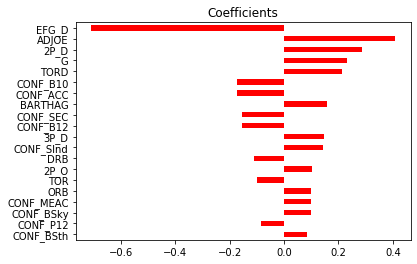

In [29]:
coef_all_df = pd.DataFrame({"Coef":linreg_all.coef_, "Coef_abs":np.abs(linreg_all.coef_)})
coef_all_df.index = df_train_X.columns
coef_all_df = coef_all_df.sort_values(by="Coef_abs")
coef_all_df["Coef"].tail(20).plot(kind="barh", title="Coefficients", color="red")
coef_all_df["Coef"].tail(20)

In [30]:
# 予測結果を逆標準化
df_test_y.predict = y_test_result * df_test_y.std() + df_test_y.mean()
y_test_result_val = df_test_y

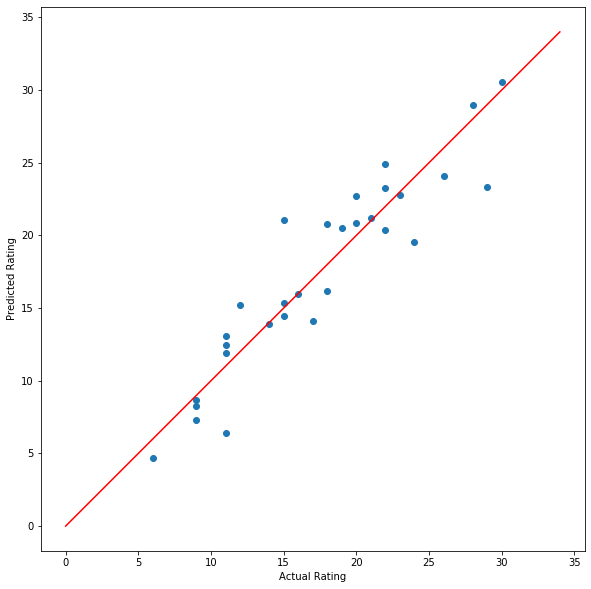

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(y_test_result_val, df_test_y.predict)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.gca().set_aspect("equal", adjustable="box")

x = np.arange(0, 35)
y=x
plt.plot(x,y,color="red")

In [155]:
rmse = np.sqrt(sum((y_test_result_val - df_test_y.predict) ** 2) / len(y_test_result_val))
print("RMSE = ", rmse)

RMSE =  2.4550200803308138
